# Assignment 1

# Formalia:

Please read the [assignment overview page](https://laura.alessandretti.com/comsocsci2023/assignments.html) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Feb 28th at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Assignment, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository (if you don't have a shared Git repository, it's fine. Remember to do it next time)
* group members' contributions

## Part 1: Using web-scraping to gather data

Gather the list of researchers that have joined the most important scientific conference in Computational Social Science in 2019. 

You can find the programmes of the 2019 edition at the links below:  
>Oral presentations: https://2019.ic2s2.org/oral-presentations/    
> Poster presentations: https://2019.ic2s2.org/posters/    

1. Inspect the HTML of the pages above and use web-scraping to get the set of participants in 2019. Share your code and add comments to guide us through it.
2. How many unique researchers you got in 2019?
3. Explain one or two decisions you took during the web-scraping exercise, for 2019 or any other year. Why did you take this choice? How might your decision impact the final number of authors?

## Part 2: Getting data from the Semantic Scholar API

> * Consider the list of author ids you have found in Week 2, Part 3, first excercise. For each author, use the Academic Graph API to find:
>    - their _aliases_
>    - their _name_
>    - their _papers_, where for each paper we want to retain: 
>        -  _title_ 
>        -  _abstract_ 
>        -  the _year_ of publication
>        -  the _externalIds_ (this is because there are universal identifiers for scientific works called DOI that we can use across platforms)
>        -  _s2FieldsOfStudy_ the fields of study
>        - _citationCount_ the number of times that this paper was cited    
> * Create three dataframe to store the data you have collected. 
>    
>    - **Author dataset:** in the author dataset, one raw is one unique author, and each row contains the following information: 
>        - *authorId*: (str) the id of the author
>        - *name*: (str) the name of the author
>        - *aliases*: (list) the aliases of the author
>        - *citationCount*: (int) the total number of citations received by an author
>        - *field*: (str) the _s2FieldsOfStudy_ that occurs most times across an author's papers (you should first obtain the *category* for each _s2FieldsOfStudy_)
>    - **Paper dataset:** in the paper dataset, one row is one unique paper, and each row contains the following information:
>        - *paperId*: (str) the id of the paper
>        - *title*: (str) the title of the paper
>        - *year*: (int) the year of publication
>        - *externalId.DOI:* (str) the DOI of the paper
>        - *citationCount*: (int) the number of citations
>        - *fields*: (list) the fields included in the paper (you should first obtain the *category* for each _s2FieldsOfStudy_)
>        - *authorIds:* (list) this is a list of *author Ids*, including all the authors of this paper that are in our author dataset
>    - **Paper abstract dataset:** in the paper abstract dataset, one row is one unique paper, and each row contains the following information: 
>        - *paperId*: (str) the id of the paper
>        - *abstract*: (str) the abstract of the paper    
>  (Note: we keep the abstract separate to keep the size of files more manageable)


1. Share the number of authors you will use as starting point in this exercises. Add a comment clarifying how many IC2S2 editions you included and if the collaborators were included or not.
2. Share the code you have used to solve the exercise above.
3. How long is your final _Author_ dataframe? How long is your final _Paper_ dataframe? 

(**Note**: If you did not manage to get all the years or all the authors' collaborators, you can still follow the exercise. Just remember to clarify your starting point.)



## Part 3: Law of large numbers.

As we have discussed in the lecture, one impact of heavy tails is that sample averages can be poor estimators of the underlying mean of the distribution.
To understand this point better, recall [the Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).  Consider a sample of IID variables $ X_1, \ldots, X_n $ from the same distribution $ F $ with finite expected value $ \mathbb E |X_i| =  \int x F(dx)  = \mu $.

According to the law, the mean of the sample $ \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i $ satisfies
<a id='equation-lln-as2'></a>
$$
\bar X_n \to \mu \text{ as } n \to \infty 
$$

This basically tell us that if we have a large enough sample, the sample mean will converge to the population mean. 

The condition that $ \mathbb E | X_i | $ is finite holds in most cases but can fail if the distribution $ F $ is very heavy tailed. Further, even when $ \mathbb E | X_i | $ is finite, the variance of a heavy tailed distribution can be so large that the sample mean will converge very slowly to the population mean. We will look into this in the following exercise. 


> 1. Sample __N=10,000__ data points from a [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with parameters $\mu = 0 $ and $\sigma = 4$, using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function. Store your data in a numpy array $\mathbf{X}$. 
> 2. Create a figure. 
>    - Plot the distribution of the data in $\mathbf{X}$. 
> 3. Compute the cumulative average of $\mathbf{X}$ (you achieve this by computing $average(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$  ). Store the result in an array. 
> 4. In a similar way, compute the cumulative standard error of $\mathbf{X}$. __Note__: the standard error of a sample is defined as $ \sigma_{M} = \frac{\sigma}{\sqrt(n)} $, where $\sigma$ is the sample standard deviation and $n$ is the sample size. Store the result in an array. 
> 5. Compute the values of the distribution mean and median using the formulas you can find on the [Wikipedia page of the Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
> 6. Create a figure. 
>     - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>     - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4). 
>     - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).
> 7.  Compute the cumulative median of $\mathbf{X}$ (you achieve this by computing $median(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$). Store the result in an array. 
> 8. Create a figure. 
>    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
>    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median [via bootstrapping](https://online.stat.psu.edu/stat500/book/export/html/619). 
> 9. Now sample __N = 10,000__ data points from a [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameters $x_m=1$ and $\alpha=0.5$ using the [`np.random.pareto()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) function, and store it in a numpy array. (_Optional:_ Write yourself the function to sample from a Pareto distribution using the [_Inverse Transform Sampling method_](https://en.wikipedia.org/wiki/Inverse_transform_sampling))
> 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9. 
> 11. Now sample __N = 10,000__ data points from a [Lognormal Distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) with parameters $\mu=0$ and $\sigma=4$ using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function, and store it in a numpy array. 
> 12. Repeat points 2 to 8 for the Lognormal Distribution sample computed in point 11. 
> 13. Now, consider the array collecting the citations of papers from 2009 you created in Exercise 3, point 1. First, compute the mean and median number of citations for this population. Then, extract a random sample of __N=10,000__ papers.  
> 14. Repeat points 2,3,4,6,7 and 8 above for the paper citation sample prepared in point 13. 

> Answer the following questions:
(__Hint__: I suggest you plot the graphs above multiple times for different random samples, to get a better understanding of what is going on)

>    -  Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
>    - Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases? 
>    - Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications? 
>    - What do you think are the main take-home message of this exercise? 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
width = 3
height = 5
dpi = 600

Text(0.5, 1.0, 'Gaussian Distribution sample')

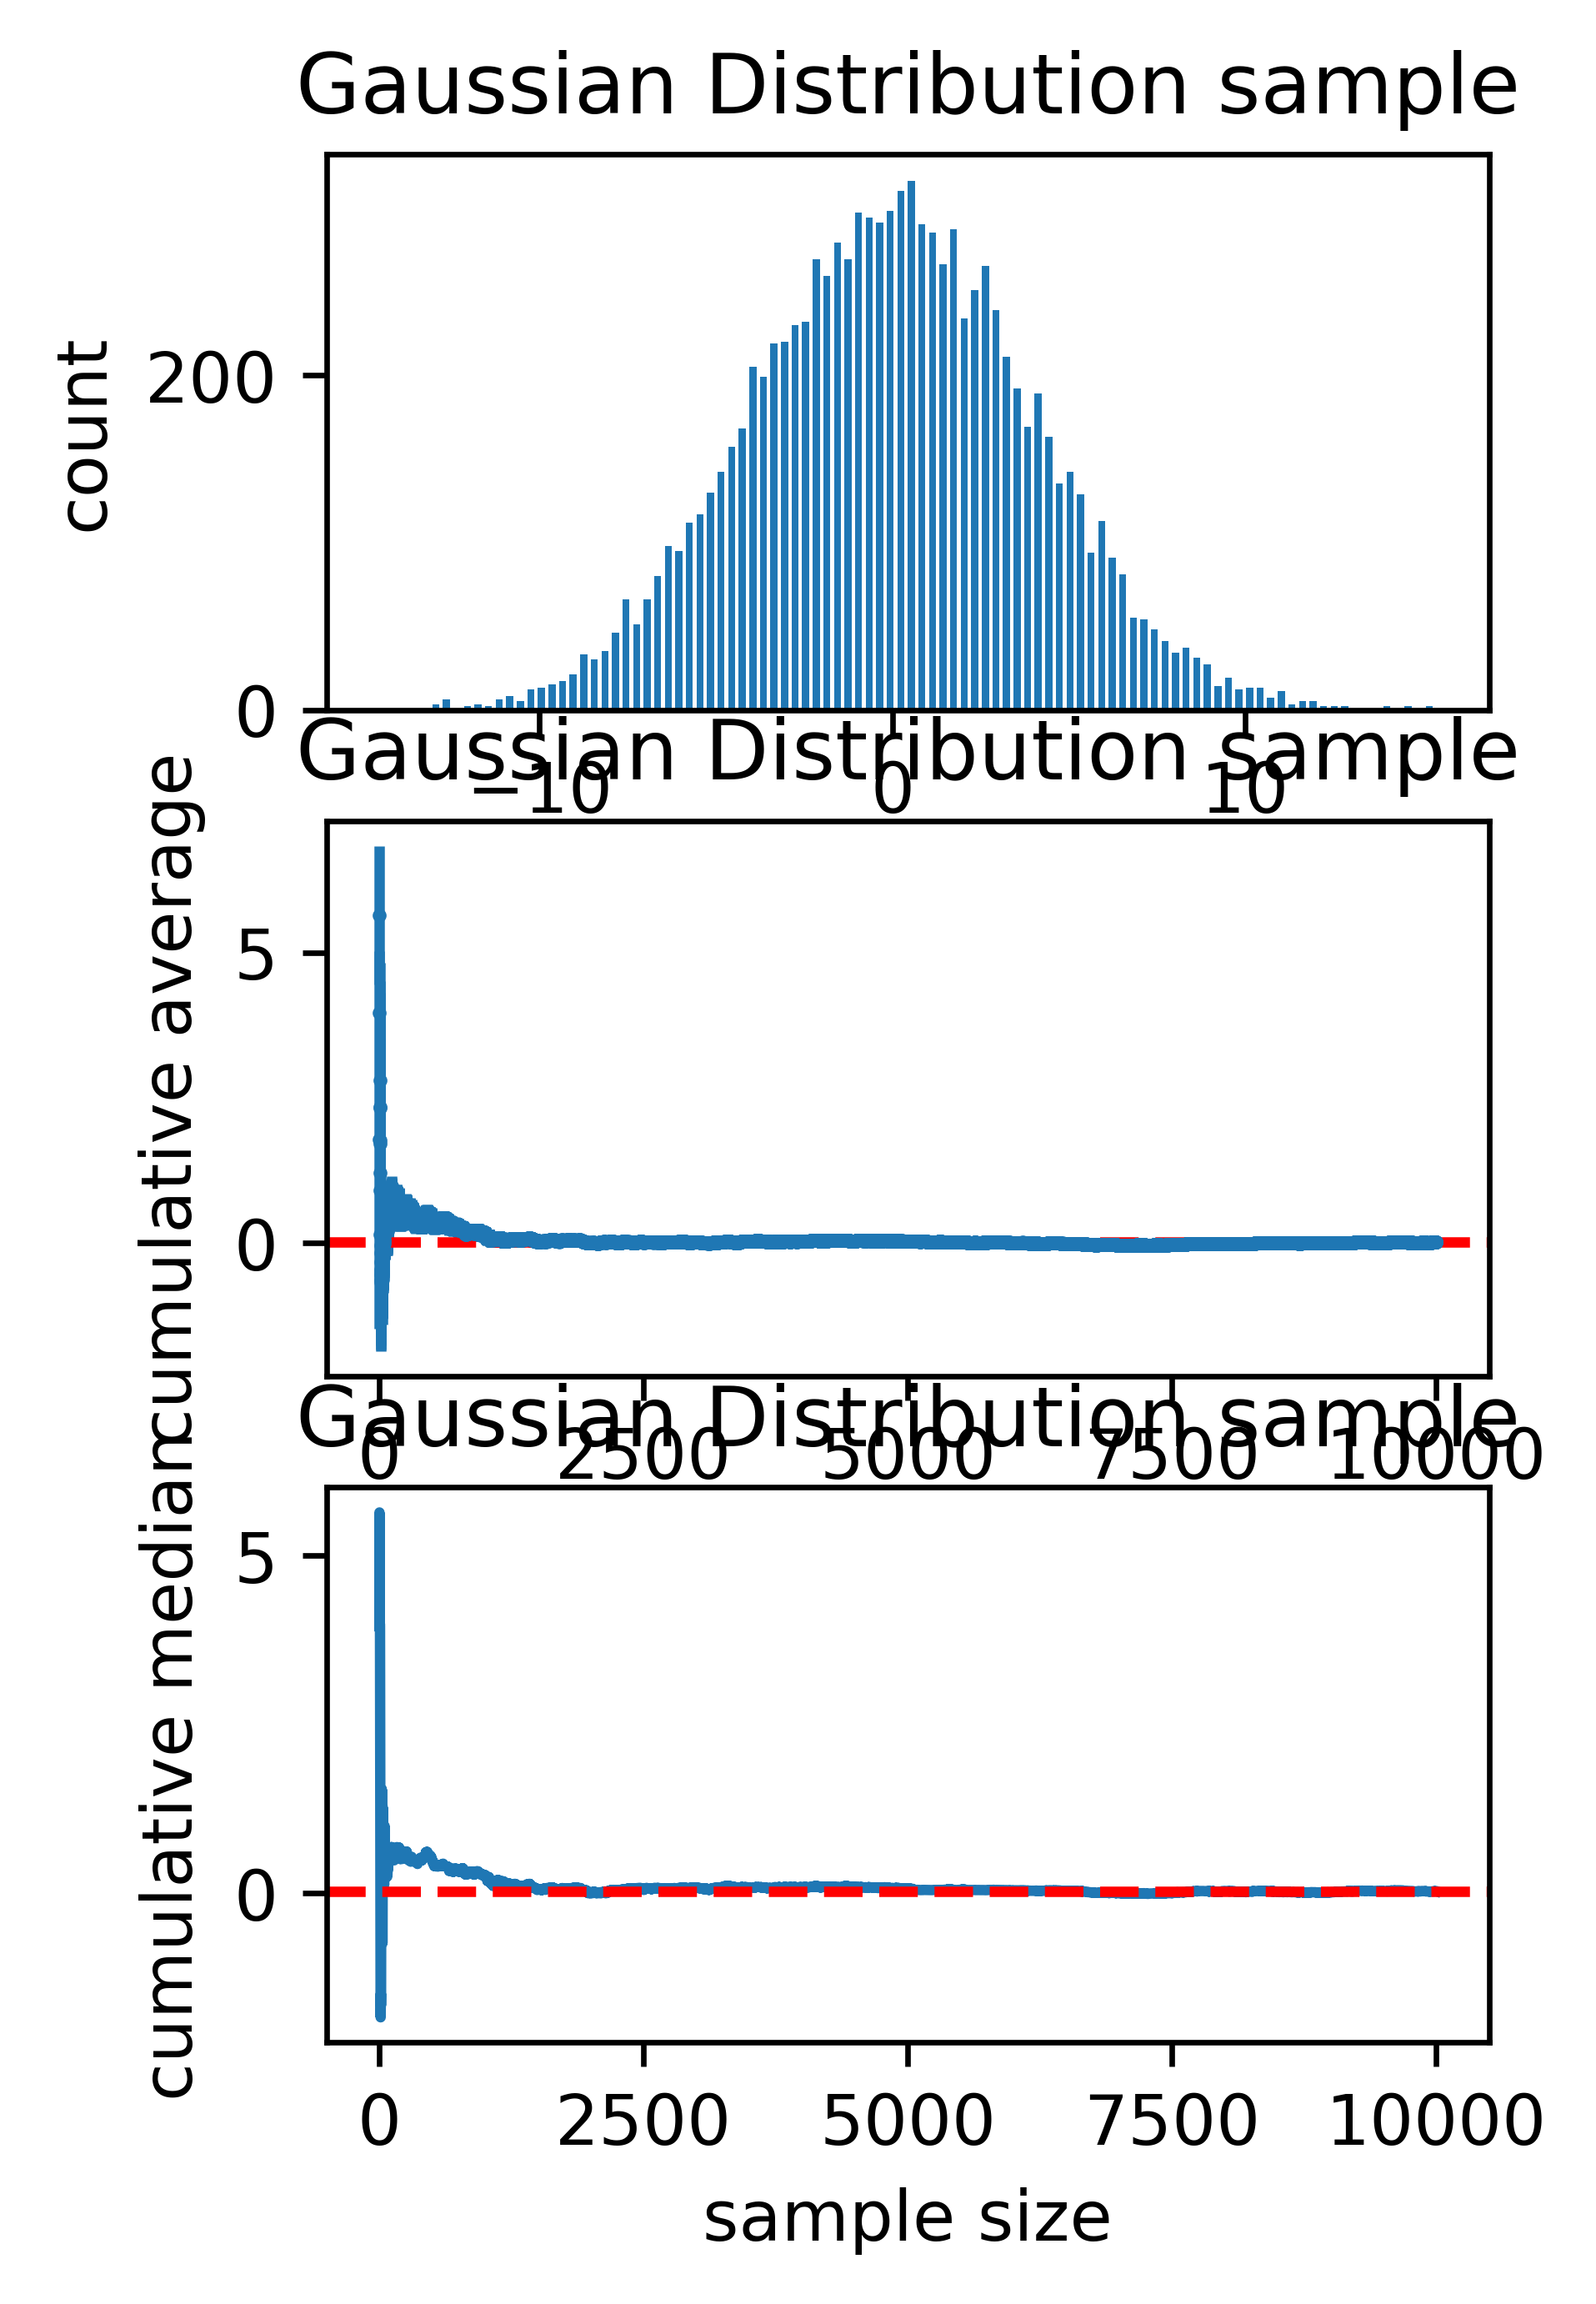

In [29]:
# 1. Sample N=10,000 data points from a Gaussian Distribution with parameters  𝜇=0  and  𝜎=4 ,
# using the np.random.standard_normal() function. Store your data in a numpy array 𝑋 .
mu = 0
sigma = 4
X = np.random.standard_normal(N) * sigma + mu

# DO points 2 to 8 for the Gaussian Distribution sample computed in point 9.
# collect them in a 1x3 grid of subplots.
fig, axs = plt.subplots(3, 1, figsize=(width, height), dpi=dpi)
axs = axs.flatten()

# plot distribution
axs[0].hist(X, bins=100, width=0.2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('count')
axs[0].set_title('Gaussian Distribution sample')

# cumulative average
cumulative_average = np.cumsum(X) / np.arange(1, N + 1)
cumulative_std = np.cumsum(X ** 2) / np.arange(1, N + 1) - cumulative_average ** 2
cumulative_std = np.sqrt(cumulative_std)
cumulative_std_error = cumulative_std / np.sqrt(np.arange(1, N + 1))

axs[1].errorbar(np.arange(1, N + 1), cumulative_average, yerr=cumulative_std_error, fmt='o', markersize=1)
axs[1].axhline(np.mean(X), color='r', linestyle='--')
axs[1].set_xlabel('sample size')
axs[1].set_ylabel('cumulative average')
axs[1].set_title('Gaussian Distribution sample')

# cumulative median
cumulative_median = np.zeros(N)
for i in range(N):
    cumulative_median[i] = np.median(X[:i + 1])

axs[2].plot(np.arange(1, N + 1), cumulative_median)
axs[2].axhline(np.median(X), color='r', linestyle='--')
axs[2].set_xlabel('sample size')
axs[2].set_ylabel('cumulative median')
axs[2].set_title('Gaussian Distribution sample')

Text(0.5, 1.0, 'Pareto Distribution')

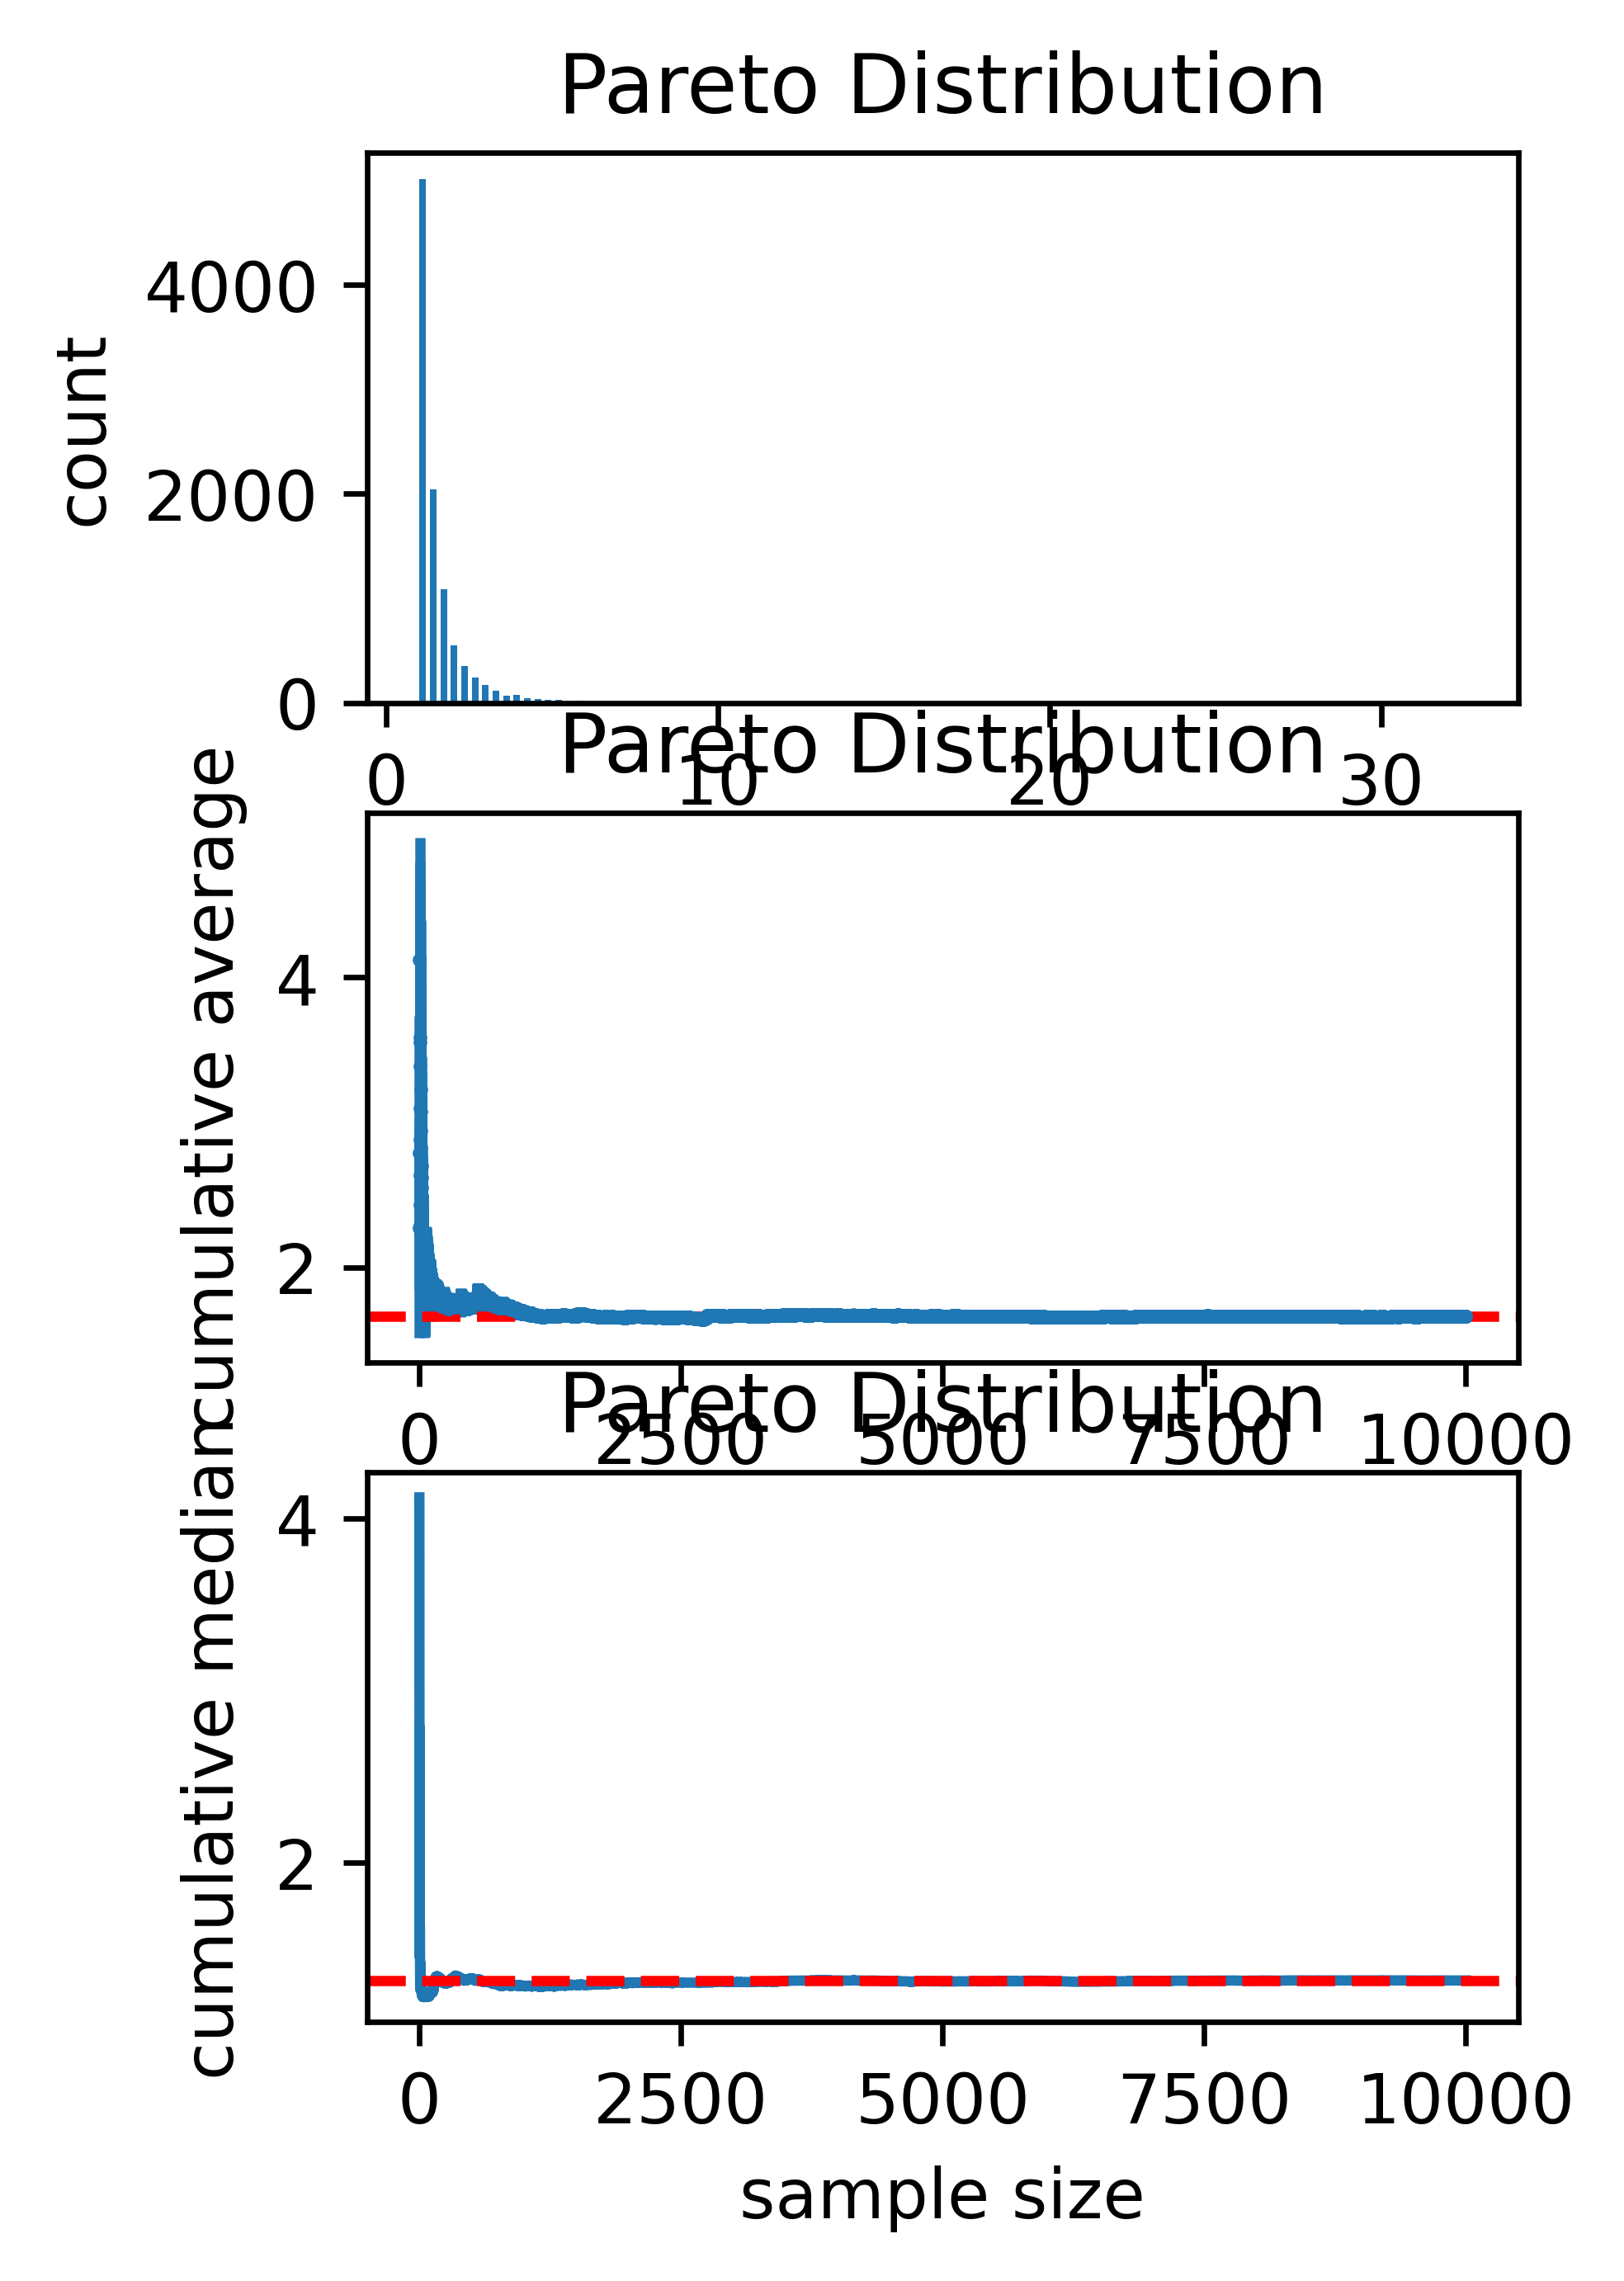

In [30]:
# 9. Now sample N=10,000 data points from a Pareto Distribution with parameters 𝑥𝑚=1 and 𝛼=2.5, using the np.random.pareto() function, and store it in a numpy array.
alpha = 2.5
xm = 1
X = np.random.pareto(alpha, N) + xm

# 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9.
# collect them in a 1x3 grid of subplots.
fig, axs = plt.subplots(3, 1, figsize=(width, height), dpi=dpi)
axs = axs.flatten()

# plot distribution
axs[0].hist(X, bins=100, width=0.2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('count')
axs[0].set_title('Pareto Distribution')

# cumulative average
cumulative_average = np.cumsum(X) / np.arange(1, N + 1)
cumulative_std = np.cumsum(X ** 2) / np.arange(1, N + 1) - cumulative_average ** 2
cumulative_std = np.sqrt(cumulative_std)
cumulative_std_error = cumulative_std / np.sqrt(np.arange(1, N + 1))

axs[1].errorbar(np.arange(1, N + 1), cumulative_average, yerr=cumulative_std_error, fmt='o', markersize=1)
axs[1].axhline(np.mean(X), color='r', linestyle='--')
axs[1].set_xlabel('sample size')
axs[1].set_ylabel('cumulative average')
axs[1].set_title('Pareto Distribution')

# cumulative median
cumulative_median = np.zeros(N)
for i in range(N):
    cumulative_median[i] = np.median(X[:i + 1])

axs[2].plot(np.arange(1, N + 1), cumulative_median)
axs[2].axhline(np.median(X), color='r', linestyle='--')
axs[2].set_xlabel('sample size')
axs[2].set_ylabel('cumulative median')
axs[2].set_title('Pareto Distribution')

Text(0.5, 1.0, 'Lognormal Distribution')

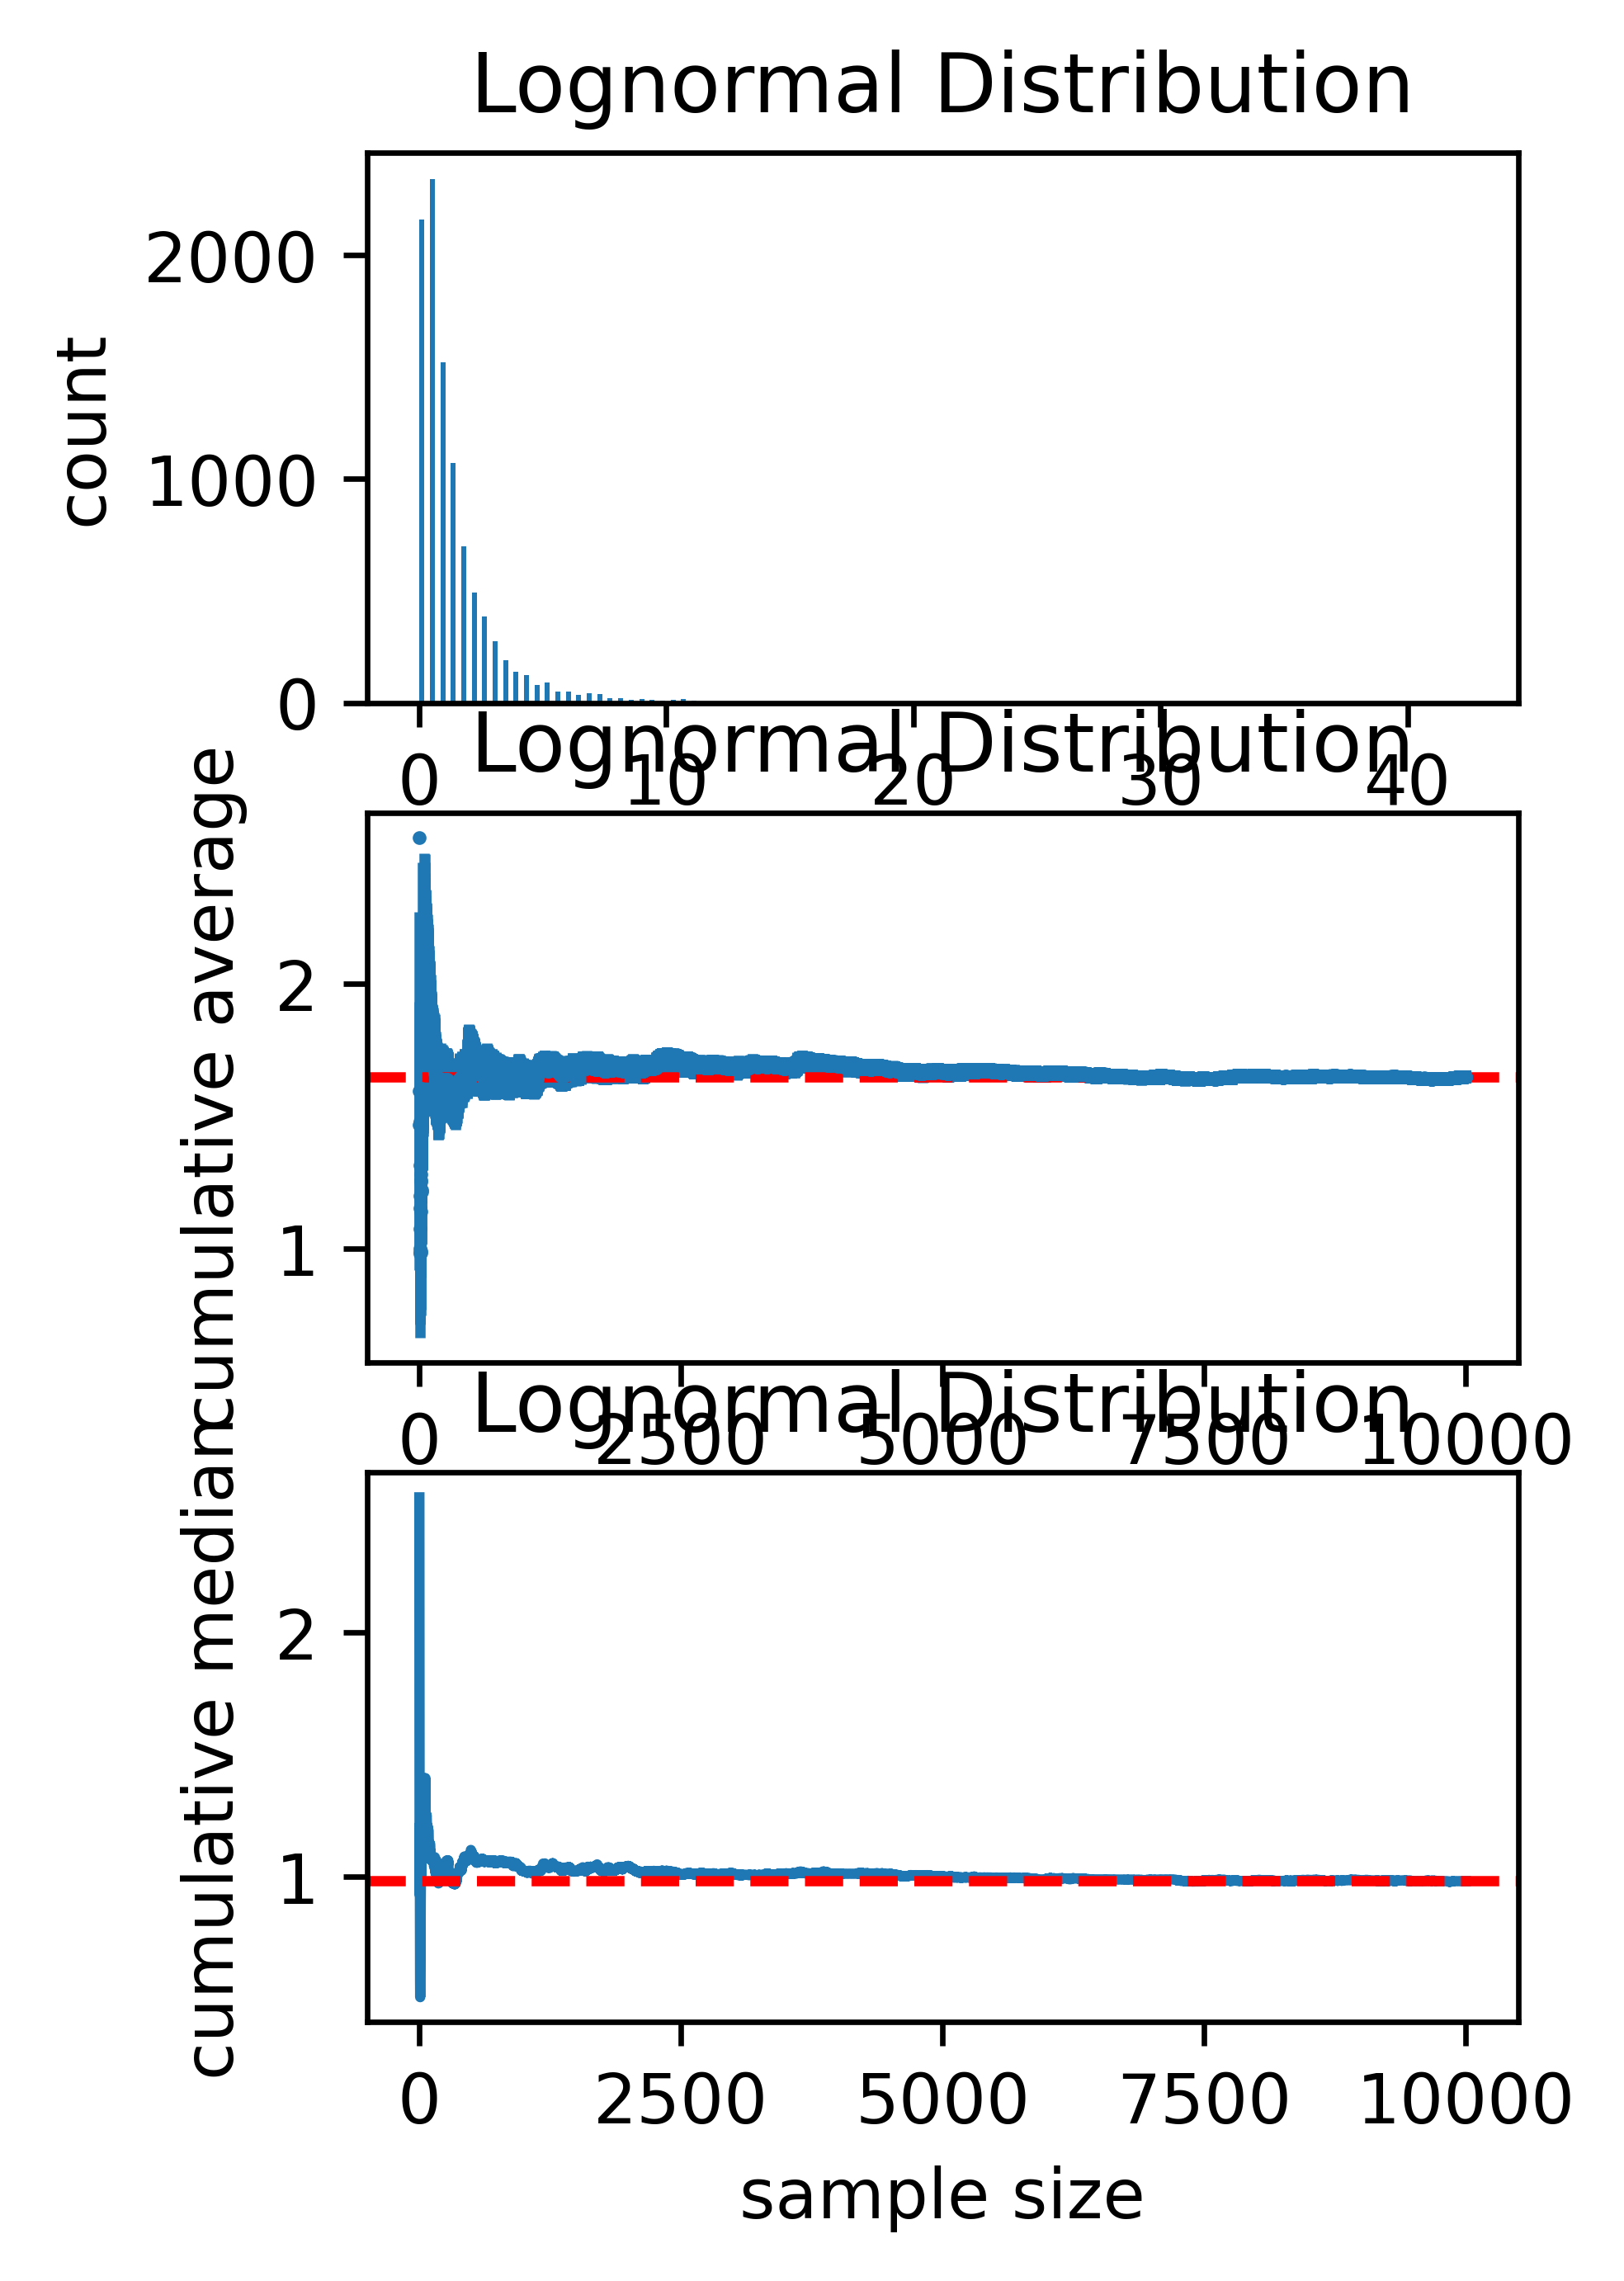

In [31]:
# 11. Now sample N=10,000 data points from a Lognormal Distribution with parameters 𝜇=0 and 𝜎=1, using the np.random.lognormal() function, and store it in a numpy array.

mu = 0
sigma = 1
X = np.random.lognormal(mu, sigma, N)

# 12. Repeat points 2 to 8 for the Lognormal Distribution sample computed in point 11.
# collect them in a 1x3 grid of subplots.
fig, axs = plt.subplots(3, 1, figsize=(width, height), dpi=dpi)
axs = axs.flatten()

# plot distribution
axs[0].hist(X, bins=100, width=0.2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('count')
axs[0].set_title('Lognormal Distribution')

# cumulative average
cumulative_average = np.cumsum(X) / np.arange(1, N + 1)
cumulative_std = np.cumsum(X ** 2) / np.arange(1, N + 1) - cumulative_average ** 2
cumulative_std = np.sqrt(cumulative_std)
cumulative_std_error = cumulative_std / np.sqrt(np.arange(1, N + 1))

axs[1].errorbar(np.arange(1, N + 1), cumulative_average, yerr=cumulative_std_error, fmt='o', markersize=1)
axs[1].axhline(np.mean(X), color='r', linestyle='--')
axs[1].set_xlabel('sample size')
axs[1].set_ylabel('cumulative average')
axs[1].set_title('Lognormal Distribution')

# cumulative median
cumulative_median = np.zeros(N)
for i in range(N):
    cumulative_median[i] = np.median(X[:i + 1])

axs[2].plot(np.arange(1, N + 1), cumulative_median)
axs[2].axhline(np.median(X), color='r', linestyle='--')
axs[2].set_xlabel('sample size')
axs[2].set_ylabel('cumulative median')
axs[2].set_title('Lognormal Distribution')
